# Principal Component Analysis

### Reference
[Andrew Ng - Principal Component Analysis (Coursera)](https://www.coursera.org/learn/machine-learning/lecture/ZYIPa/principal-component-analysis-algorithm)

### Initialization

In [68]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [69]:
A = np.array([[2, 2], 
              [3, 3], 
              [3, 2], 
              [4, 3], 
              [5, 5]])

### Data preprocessing (Mean normalization)

Compute data points' mean and subtract to center points around origin.

In [89]:
mean = A.mean(axis=0)
normalized = A - mean
normalized

array([[-1.4, -1. ],
       [-0.4,  0. ],
       [-0.4, -1. ],
       [ 0.6,  0. ],
       [ 1.6,  2. ]])

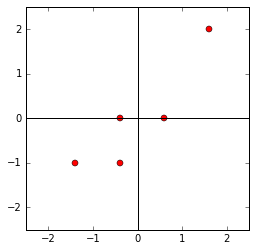

In [90]:
plt.plot(*zip(*normalized), 'ro')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.axvline(color='black') 
plt.axhline(color='black')
plt.axes().set_aspect('equal')

### Compute Covariance matrix

In [91]:
sigma = normalized.T.dot(normalized) / len(A)
sigma

array([[ 1.04,  1.  ],
       [ 1.  ,  1.2 ]])

### Compute Eigenvectors using Singular value decomposition

In [92]:
from numpy.linalg import svd
U, S, V = svd(sigma) # Lengths and normalied eigenvectors, v[:, i] refers to w[i]
U

array([[-0.6783269 , -0.73476024],
       [-0.73476024,  0.6783269 ]])

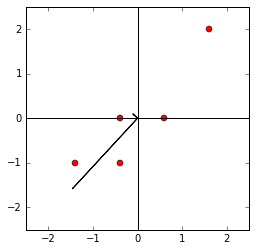

In [93]:
plt.plot(*zip(*normalized), 'ro')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.axvline(color='black')
plt.axhline(color='black')
plt.arrow(0, 0, U[0, 0] * S[0], U[1, 0] * S[0])
plt.arrow(0, 0, U[0, 1] * S[1], U[1, 1] * S[1])
plt.axes().set_aspect('equal')

### Transform data

In [94]:
U.T # 2 x 2, rows represent eigenvectors
normalized.T # 2 x 5, each column represents a (normalized) data point
U.T.dot(normalized.T) # 2 x 5, each column represents a transformed data point
transformed = U.T.dot(normalized.T).T # 5 x 2, each row represents a transformed data point
transformed

array([[ 1.68441791,  0.35033743],
       [ 0.27133076,  0.2939041 ],
       [ 1.006091  , -0.38442281],
       [-0.40699614, -0.44085614],
       [-2.55484353,  0.18103742]])

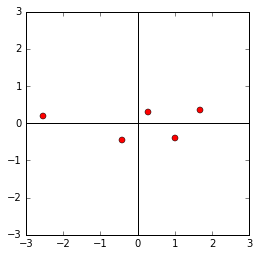

In [95]:
# Shift principal components to x and y axes, respectively.
plt.plot(*zip(*transformed), 'ro')
plt.axis([-3, 3, -3, 3]) # widened x-axis
plt.axvline(color='black')
plt.axhline(color='black')
plt.axes().set_aspect('equal')

In [96]:
reduced = transformed.copy()
reduced[:, 1] = 0
reduced = U.T.dot(reduced.T).T
reduced

array([[-1.14258598, -1.23764331],
       [-0.18405096, -0.19936306],
       [-0.68245859, -0.73923567],
       [ 0.27607643,  0.29904458],
       [ 1.7330191 ,  1.87719745]])

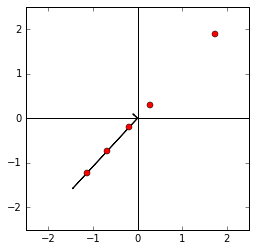

In [97]:
plt.plot(*zip(*reduced), 'ro')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.axvline(color='black')
plt.axhline(color='black')
plt.arrow(0, 0, U[0, 0] * S[0], U[1, 0] * S[0])
plt.arrow(0, 0, U[0, 1] * S[1], U[1, 1] * S[1])
plt.axes().set_aspect('equal')

## Advantages of PCA

### Variance of naively reduced values

In [179]:
naively_reduced = normalized.copy()
naively_reduced.var(axis=0)

array([ 1.04,  1.2 ])

In [109]:
naively_reduced[:, 1].var()

1.2

### Variance of reduced values

In [181]:
reduced = transformed.copy()
reduced.var(axis=0)

array([ 2.1231949,  0.1168051])

In [114]:
reduced[:, 0].var()

2.1231948963187577

### Conclusion
Naive reduction results in much greater loss of information in terms of variance lost.

## PCA's Problems

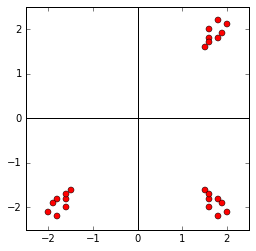

In [149]:
gauss = np.array([[-1.6, -2], [-2, -2.1], [-1.8, -2.2], [-1.8, -1.8], [-1.6, -1.8], [-1.5, -1.6], [-1.6, -1.7], [-1.9, -1.9]])
axis_switch = gauss.copy()
axis_switch[:, 0] = -axis_switch[:, 0]
multi_gauss = np.concatenate((gauss, gauss * -1, axis_switch))

plt.plot(*zip(*multi_gauss), 'ro')
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.axvline(color='black') 
plt.axhline(color='black')
plt.axes().set_aspect('equal')

Can be reduced by first applying a clustering and then for each point saving it's cluster and distance to the cluster mean.

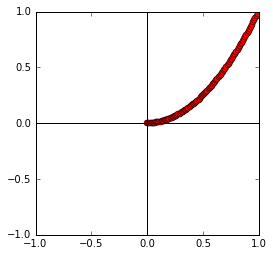

In [176]:
double_gauss = zip(np.arange(0., 1., 0.01), np.arange(0., 1., 0.01) ** 2)
plt.plot(*zip(*double_gauss), 'ro')
plt.axis([-1, 1, -1, 1])
plt.axvline(color='black') 
plt.axhline(color='black')
plt.axes().set_aspect('equal')

Can be reduced by fitting a polynomial (non-linear regression) and mapping data points onto their distance to the polynomial.